In [3]:
from matplotlib import pyplot as plt
from table import LUT_table #this is what does LUT interpolation, AJR made fixes to nearest neighbor finding
mt = (f['TTRUTSBT']+f['TTRUTSMT']+f['TTRUTSTT'])/3. #the temperatures used for autofocus
af = -8400+(7.-mt)*110 #the autofocus equation
lut = LUT_table('20190415frommartinilut_v2.txt') #Look up table
'''
make array with focus values from LUT
'''
zlut = np.zeros(len(af))
for i in range(0,len(f)):
    zlut[i] = lut.interpolate_delaunay(f[i]['MOUNTAZ'],f[i]['MOUNTEL'])[2] #get values, code reports when uses nearest neighbor

aflut = af -(zlut+8400) #auto focus + look up table, with signs reversed based on analysis below

Loaded 20190415frommartinilut_v2.txt
Replace nan with nearest -2000.0 for element 0
Replace nan with nearest -4000.0 for element 1
Replace nan with nearest -8400.0 for element 2
Replace nan with nearest -100.0 for element 3
Replace nan with nearest 25.0 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -1888.45 for element 0
Replace nan with nearest -4088.52 for element 1
Replace nan with nearest -8433.69 for element 2
Replace nan with nearest -107.38 for element 3
Replace nan with nearest 34.31 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -1994.26 for element 0
Replace nan with nearest -4142.64 for element 1
Replace nan with nearest -8437.0 for element 2
Replace nan with nearest -111.9 for element 3
Replace nan with nearest 25.48 for element 4
Replace nan with nearest 0.0 for element 5
Replace nan with nearest -2000.0 for element 0
Replace nan with nearest -4000.0 for element 1
Replace nan with nearest -8400.0 for el

/global/u2/a/ajross/table.py:277: UserWarning: Warning: converting a masked element to nan.
  if repr(val)=='nan' or math.isnan(val):


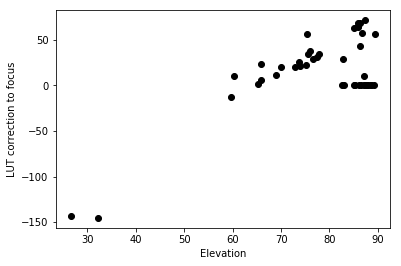

In [4]:
'''
plot elevation vs LUT difference to see that results make sense
points near 90,0 were nearest neighbors to az,el 0,90 and get the fiducial value
'''
plt.plot(f['MOUNTEL'],aflut-af,'ko')
plt.xlabel('Elevation')
plt.ylabel('LUT correction to focus')
plt.show()

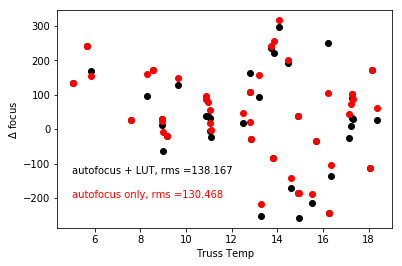

In [9]:
plt.plot(mt,f['focus_C']-aflut,'ko')
rmsl = np.std(f['focus_C']-aflut-np.mean(f['focus_C']-aflut))
plt.text(5,-130,'autofocus + LUT, rms ='+str(np.round(rmsl,3)),color='k')
plt.plot(mt,f['focus_C']-af,'ro')
rmsn = np.std(f['focus_C']-af-np.mean(f['focus_C']-af))
plt.text(5,-200,'autofocus only, rms ='+str(np.round(rmsn,3)),color='r')
plt.xlabel('Truss Temp')
plt.ylabel(r'$\Delta$ focus')
plt.show()

In [23]:
'''
So, the autofocus actually makes things slightly worse compared to just autofocus
Below, look just at temperature focus relationships and then revisit LUT
'''

coefficients are
-119.951547577 -7457.40231156


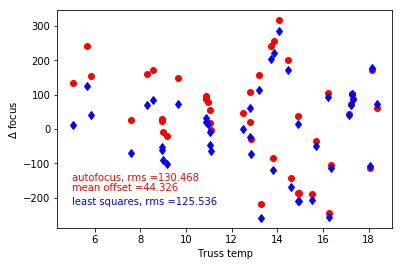

'\nleast-squares not that much better than autofocus\n'

In [15]:
'''
least squares between truss temp and CIC focus
'''
A = np.vstack([mt, np.ones(len(mt))]).T
m, c = np.linalg.lstsq(A, f['focus_C'])[0]
afme = m*mt+c
print('coefficients are')
print(m,c)
'''
compare fit and autofocus residual
'''
plt.plot(mt,f['focus_C']-af,'ro')
rmsa = np.std(f['focus_C']-af)
am = np.mean(f['focus_C']-af)
plt.text(5,-150,'autofocus, rms ='+str(np.round(rmsa,3)),color='r')
plt.text(5,-180,'mean offset ='+str(np.round(am,3)),color='r')
plt.plot(mt,f['focus_C']-afme,'bd')
rmsm = np.std(f['focus_C']-afme)
plt.text(5,-220,'least squares, rms ='+str(np.round(rmsm,3)),color='b')
plt.xlabel('Truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.show()
'''
least-squares not that much better than autofocus
'''

In [17]:
'''
Now see what correlates with focus least-square residuals
look at available temperatures and temperature differences
some quantities are basically null tests and give an idea of the random noise
'''
df = f['focus_C']-afme
vl = []
ql = []
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0) #some quantities are 0 when there was no data
    w &= (f[q]*0 == 0)#some quantities are NaN
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA 0.314255768638 45
0.308970748239 45
TARGTDEC 0.109781143677 45
0.108135911342 45
MOUNTHA 0.0935679304818 45
0.0922484640167 45
MOUNTAZ -0.069135771906 45
-0.0688639790416 45
MOUNTEL -0.156166479698 45
-0.152995105294 45
AIRMASS 0.0798433433767 45
0.0048713591967 45
CI-T1 -0.2574497245 45
-0.714440321764 45
CI-T2 -0.276967894429 45
-0.739258146182 45
CI-T3 -0.290297507527 45
-0.734493046131 45
CI-T4 -0.288406759467 45
-0.744255301052 45
CI-T5 -0.19228159772 45
-0.599099993119 45
TDEWPNT 0.147564867405 45
0.0831540630415 45
TAIRFLOW nan 1
nan 1
TAIRITMP -0.324773655764 45
-0.297215003439 45
TAIROTMP -0.303706022934 45
-0.250833320196 45
TAIRTEMP -0.000484627822892 45
-0.015941469035 45
TCASITMP nan 45
-5.02990949734e-15 45
TCASOTMP -0.132973201544 45
-0.544334562708 45
TCSITEMP -0.158828253488 45
-0.44157945494 45
TCSOTEMP -0.0839248553804 45
-0.617850702299 45
TDBTEMP -0.130591874757 45
-0.199387907703 45
TPMNIBT -0.449498061915 45
-0.495735249614 45
TPMEOBT -0.375870592522 45
-

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

In [18]:
'''
print out most significant correlations
'''
vl = np.array(vl)
w = vl*0 != 0
vl[w] = 0
ind = np.argmax(vl)
print(vl[ind],ql[ind])
indm = np.argmin(vl)
print(vl[indm],ql[indm])

0.467875508105 dTTRSTEMP
-0.779266260337 dTTRUSTBT


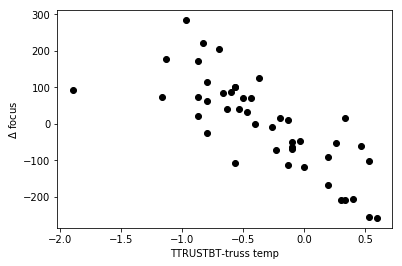

In [21]:
'''
difference between truss temp and TTRUSTBT most significant
plot what it looks like
'''
plt.plot(f['TTRUSTBT']-mt,df,'ko')
plt.xlabel('TTRUSTBT-truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.show()

Text(5,-220,'new least squares, rms =78.672')

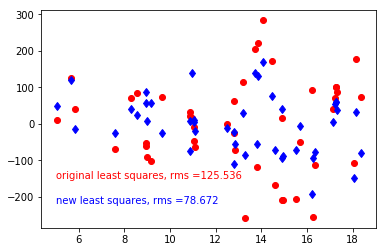

In [23]:
'''
indeed, that looks pretty significant
get coefficients for it and look at improvement
'''
dt = f['TTRUSTBT']-mt
A = np.vstack([dt, np.ones(len(mt))]).T
md, cd = np.linalg.lstsq(A, f['focus_C']-afme)[0]
modzd = afme+md*dt+cd
rmsd = np.std(f['focus_C']-modzd)
plt.plot(mt,f['focus_C']-afme,'ro')
plt.text(5,-150,'original least squares, rms ='+str(np.round(rmsm,3)),color='r')
plt.plot(mt,f['focus_C']-modzd,'bd')
plt.text(5,-220,'new least squares, rms ='+str(np.round(rmsd,3)),color='b')

In [27]:
'''
Nice improvement, repeat procedure to see what else still correlates
'''
df = f['focus_C']-modzd
vl = []
ql = []
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0) #some quantities are 0 when there was no data
    w &= (f[q]*0 == 0)#some quantities are NaN
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

print('\n')
'''
print out most significant correlations
'''
vl = np.array(vl)
w = vl*0 != 0
vl[w] = 0
ind = np.argmax(vl)
print(vl[ind],ql[ind])
indm = np.argmin(vl)
print(vl[indm],ql[indm])    

TARGTRA 0.208263829319 45
0.224927059202 45
TARGTDEC 0.429696617605 45
0.526110796018 45
MOUNTHA 0.176623614963 45
0.230454473857 45
MOUNTAZ 0.0136665654252 45
0.0227096072404 45
MOUNTEL 0.190921729709 45
0.261723045992 45
AIRMASS -0.342090683955 45
0.264792875675 45
CI-T1 -0.362772086482 45
-0.203409507574 45
CI-T2 -0.374609329858 45
-0.233686490103 45
CI-T3 -0.376410127575 45
-0.231812827422 45
CI-T4 -0.385174490907 45
-0.247541305087 45
CI-T5 -0.332188843084 45
-0.131838739409 45
TDEWPNT 0.223996256919 45
0.356381669278 45
TAIRFLOW nan 1
nan 1
TAIRITMP -0.268220610895 45
0.23247281128 45
TAIROTMP -0.294576459094 45
0.219933894721 45
TAIRTEMP -0.281831043409 45
0.199779973856 45
TCASITMP nan 45
0.285597922154 45
TCASOTMP -0.263942667932 45
0.177763577135 45
TCSITEMP -0.222980309385 45
0.241274402627 45
TCSOTEMP -0.281460907364 45
0.0763336028302 45
TDBTEMP -0.177431267979 45
0.214701978864 45
TPMNIBT -0.353339761279 45
0.0800779771847 45
TPMEOBT -0.288188488579 45
0.123691425572 45
T

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

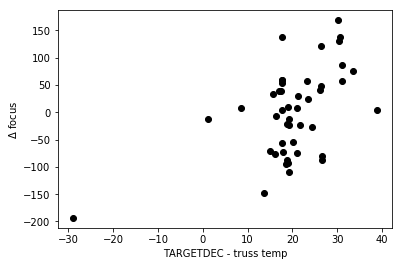

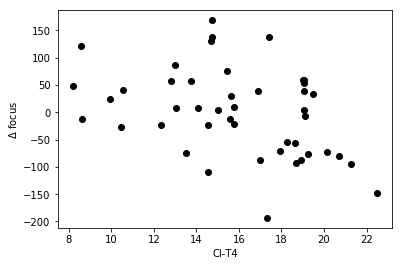

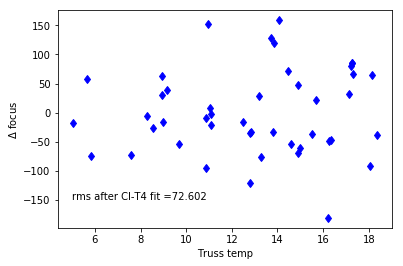

In [31]:
'''
dTARGETDEC is probably noise (difference between temp and DEC); plot it anyway
CI-T4 is temp on focal plane, so this could be tracking temperature differences
'''
plt.plot(f['TARGTDEC']-mt,f['focus_C']-modzd,'ko')
plt.xlabel('TARGETDEC - truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.show()
plt.plot(f['CI-T4'],f['focus_C']-modzd,'ko')
plt.xlabel('CI-T4')
plt.ylabel(r'$\Delta$ focus')

plt.show()
'''
CI-T4 trend looks like it could be something, get correction 
'''
df = f['focus_C']-modzd
A = np.vstack([f['CI-T4'], np.ones(len(mt))]).T
mt4, ct4 = np.linalg.lstsq(A, df)[0]
modz4 = modzd+mt4*(f['CI-T4'])+ct4
rms4 = np.std(f['focus_C']-modz4)
plt.plot(mt,f['focus_C']-modz4,'bd')
plt.xlabel('Truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.text(5,-150,'rms after CI-T4 fit ='+str(np.round(rms4,3)))
plt.show()


In [38]:
'''
do another round
'''
df = f['focus_C']-modz4
vl = []
ql = []
hquant = ['CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0) #some quantities are 0 when there was no data
    w &= (f[q]*0 == 0)#some quantities are NaN
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

print('\n')
'''
print out most significant correlations
'''
vl = np.array(vl)
w = vl*0 != 0
vl[w] = 0
ind = np.argmax(vl)
print(vl[ind],ql[ind])
indm = np.argmin(vl)
print(vl[indm],ql[indm])    

CI-T1 0.0234793656289 45
-0.1514045908 45
CI-T2 0.0111299238502 45
-0.176847344015 45
CI-T3 0.00910389339966 45
-0.171218862038 45
CI-T4 4.09739324009e-17 45
-0.201228082053 45
CI-T5 0.0541869450359 45
-0.074652174996 45
TDEWPNT 0.222547033289 45
0.0633595387028 45
TAIRFLOW nan 1
nan 1
TAIRITMP 0.0922772953606 45
-0.0443976657678 45
TAIROTMP 0.0604028656589 45
-0.0749928528997 45
TAIRTEMP 0.0803259192509 45
0.0891620166234 45
TCASITMP nan 45
-0.0769935449955 45
TCASOTMP 0.103751975184 45
0.0855127650884 45
TCSITEMP 0.136230434357 45
0.14658067185 45
TCSOTEMP 0.0873617815464 45
0.0639625736708 45
TDBTEMP 0.128874577994 45
0.0658532159204 45
TPMNIBT -0.0227464236163 45
-0.151728493177 45
TPMEOBT 0.0463129402625 45
-0.0753542574217 45
TTRSTEMP 0.0749398423508 45
0.0140173610309 45
TTRWTEMP 0.0900121847908 45
0.261567767697 45
TTRUETBT 0.0766495467561 45
-0.0114169040586 45
TTRUETTT 0.0923053120641 45
0.119210645418 45
TTRUNTBT 0.0942814146022 45
0.103637337048 45
TTRUNTTT 0.104024784715 4

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

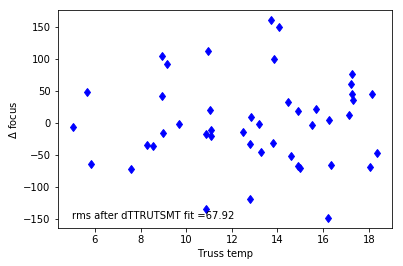

-119.951547577 -182.965785193 -8.5942780788 309.343075566
-7352.7841813


In [43]:
'''
get correction for dTTRUTSMT
'''

A = np.vstack([f['TTRUTSMT']-mt, np.ones(len(mt))]).T
mtsm, ctsm = np.linalg.lstsq(A, df)[0]
modzsm = modz4+mtsm*(f['TTRUTSMT']-mt)+ctsm
rmssm = np.std(f['focus_C']-modzsm)
plt.plot(mt,f['focus_C']-modzsm,'bd')
plt.xlabel('Truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.text(5,-150,'rms after dTTRUTSMT fit ='+str(np.round(rmssm,3)))
plt.show()
print(m,md,mt4,mtsm)
print(c+cd+ct4+ctsm)

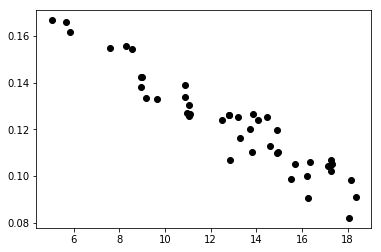

In [42]:
'''
that is now about as good as it gets for dT/dt correction
total equation is
Z = -7353.-119.95*trusstemp-182.97*(TTRUSTBT-trusstemp)-8.59*CI-T4+309.3*(TTRUTSMT-trusstemp)
'''
#confirm equation
modztot = -7353.-119.95*mt-182.97*(f['TTRUSTBT']-mt)-8.59*f['CI-T4']+309.3*(f['TTRUTSMT']-mt)
plt.plot(mt,modzsm-modztot,'ko')
'''
that is good within 0.2 degrees
'''

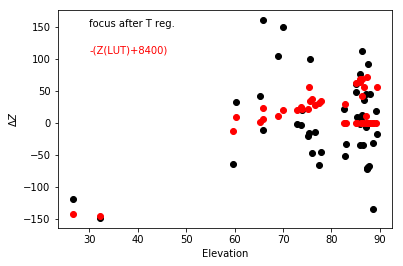

In [44]:
'''
Now see if LUT improves things
'''
df =  f['focus_C']-  modztot
plt.plot(f['MOUNTEL'],df,'ko')
plt.plot(f['MOUNTEL'],-(zlut+8400),'ro')
plt.xlabel('Elevation')
plt.ylabel(r'$\Delta Z$')
plt.text(30,150,'focus after T reg.',color='k')
plt.text(30,110,'-(Z(LUT)+8400)',color='r')
plt.show()
'''
residual vs. elevation agrees pretty well with -(zlut+8400); this is opposite of what LUT+autofocus does
'''

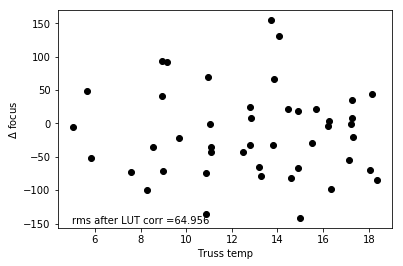

In [45]:
'''
Now look at how much LUT improves things
'''
modzlut = modztot-(zlut+8400)
rmslut = np.std(f['focus_C']-modzlut)
plt.plot(mt,f['focus_C']-modzlut,'ko')
plt.xlabel('Truss temp')
plt.ylabel(r'$\Delta$ focus')
plt.text(5,-150,'rms after LUT corr ='+str(np.round(rmslut,3)))
plt.show()


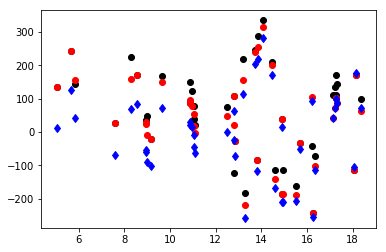

125.535513401
0.451082795254 dTTRUTSMT
-0.585833302736 dCI-T4


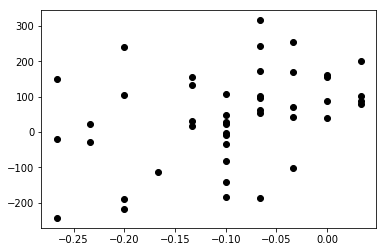

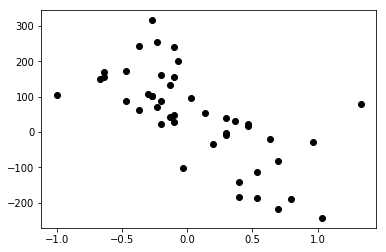

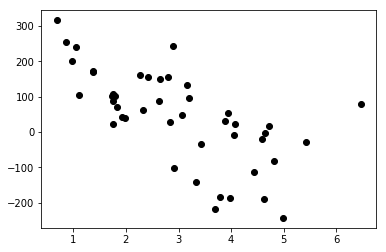

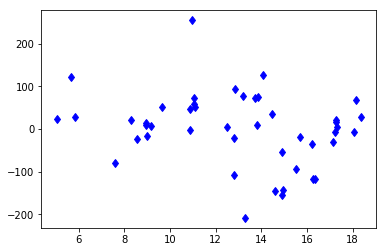

83.8445714044


In [4]:
'''
below here is old stuff
'''


plt.plot(f['TTRUSTST']-mt,f['focus_C']-af,'ko')
plt.show()
plt.plot(f['CI-T4']-mt,f['focus_C']-af,'ko')
plt.show()
#plt.plot(mt,f['focus_C']-aflut,'ko')
#plt.plot(mt,f['focus_C']-af,'ro')
plt.plot(mt,f['focus_C']-(m*mt+c)-(md*dt+cd),'bd')
plt.show()
print(np.std(f['focus_C']-(m*mt+c)-(md*dt+cd)))

In [5]:
vl = []
ql = []
df = f['focus_C']-(m*mt+c)-(md*dt+cd)
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0)
    w &= (f[q]*0 == 0)
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA -0.0930122446762 45
-0.0738157607814 45
TARGTDEC 0.0978856239067 45
0.186350650346 45
MOUNTHA 0.105848272313 45
0.153601340495 45
MOUNTAZ -0.0138311257557 45
-0.0058228365021 45
MOUNTEL 0.0482624599669 45
0.112578771641 45
AIRMASS -0.160950440487 45
0.239955652577 45
CI-T1 -0.241421717108 45
0.0324240471884 45
CI-T2 -0.250325702573 45
0.0017819445092 45
CI-T3 -0.246016032761 45
0.00757663613868 45
CI-T4 -0.252910344337 45
-3.52537609006e-16 45
CI-T5 -0.199438491344 45
0.168308504294 45
TDEWPNT 0.18779155972 45
0.307064599956 45
TAIRFLOW nan 1
nan 1
TAIRITMP -0.356324935234 45
0.0918003665587 45
TAIROTMP -0.353517589794 45
0.113057344699 45
TAIRTEMP -0.254365658574 45
-0.0865612498647 45
TCASITMP nan 45
0.249717410644 45
TCASOTMP -0.35324251233 45
-0.345866411176 45
TCSITEMP -0.382801829754 45
-0.311263110181 45
TCSOTEMP -0.309209291703 45
-0.397862908711 45
TDBTEMP -0.35130101364 45
-0.111770570675 45
TPMNIBT -0.537222912227 45
-0.18173794011 45
TPMEOBT -0.515681232464 45
-0.24

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

13.5886363636


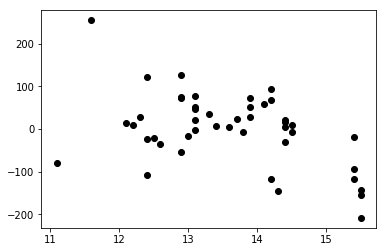

[ 13.58863636]


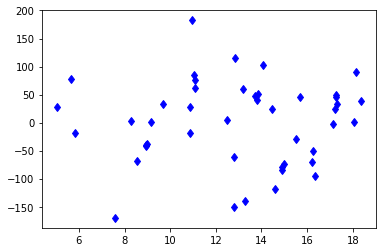

73.9649851464


In [6]:
ambn = f['AMNIENTN']
w = f['AMNIENTN'] != 0
meant = np.mean(f[w]['AMNIENTN'])
print(meant)
ambn[~w] = meant
plt.plot(ambn,df,'ko')
plt.show()
print(ambn[~w])
modz = (m*mt+c)+(md*dt+cd)
A = np.vstack([ambn, np.ones(len(mt))]).T
ma, ca = np.linalg.lstsq(A, f['focus_C']-modz)[0]
plt.plot(mt,f['focus_C']-modz-(ma*ambn+ca),'bd')
plt.show()
print(np.std(f['focus_C']-modz-(ma*ambn+ca)))

In [7]:
modza = modz + ma*ambn+ca
vl = []
ql = []
df = f['focus_C']-modza
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0)
    w &= (f[q]*0 == 0)
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA -0.213808328025 45
-0.212370277541 45
TARGTDEC 0.21131622557 45
0.19714421113 45
MOUNTHA 0.0769015425233 45
0.0697908198666 45
MOUNTAZ -0.10239603758 45
-0.102966822944 45
MOUNTEL 0.215603074904 45
0.203234250986 45
AIRMASS -0.32051756897 45
-0.0501206926082 45
CI-T1 0.0831509277887 45
0.144797315153 45
CI-T2 0.0787714630807 45
0.128269447381 45
CI-T3 0.0805187722021 45
0.126625679684 45
CI-T4 0.0755398077211 45
0.115069757327 45
CI-T5 0.112372059777 45
0.25348458458 45
TDEWPNT 0.0890814956905 45
0.0255718047468 45
TAIRFLOW nan 1
nan 1
TAIRITMP 0.0219845673522 45
-0.0310187598692 45
TAIROTMP 0.0174896025983 45
-0.0351194528385 45
TAIRTEMP 0.0280719781191 45
-0.0899051196121 45
TCASITMP nan 45
-0.0305583414179 45
TCASOTMP -0.0460370889189 45
-0.323083694031 45
TCSITEMP -0.0519386199436 45
-0.236549143407 45
TCSOTEMP -0.0110841960075 45
-0.311479082208 45
TDBTEMP -0.0884233431652 45
-0.186963502575 45
TPMNIBT -0.160186893511 45
-0.226928033709 45
TPMEOBT -0.150929373199 45
-0.256

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

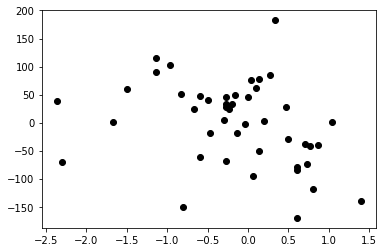

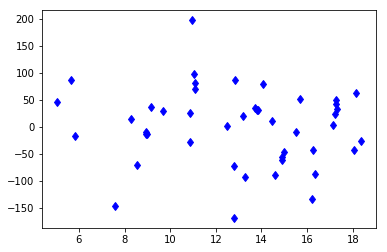

69.9982722919


In [8]:
plt.plot(f['TCASOTMP']-mt,df,'ko')
plt.show()
A = np.vstack([f['TCASOTMP']-mt, np.ones(len(mt))]).T
mcas, ccas = np.linalg.lstsq(A, df)[0]
plt.plot(mt,f['focus_C']-modza-(mcas*(f['TCASOTMP']-mt)+ccas),'bd')
plt.show()
print(np.std(f['focus_C']-modza-(mcas*(f['TCASOTMP']-mt)+ccas)))

In [9]:
modzac = modza + mcas*(f['TCASOTMP']-mt)+ccas
vl = []
ql = []
df = f['focus_C']-modzac
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0)
    w &= (f[q]*0 == 0)
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA -0.164667116532 45
-0.154186702721 45
TARGTDEC 0.270014179501 45
0.30529758998 45
MOUNTHA 0.0731251787568 45
0.0936306237576 45
MOUNTAZ -0.121390248576 45
-0.117434541105 45
MOUNTEL 0.324634970568 45
0.34659848644 45
AIRMASS -0.450107936368 45
0.081772607097 45
CI-T1 -0.00509701678774 45
0.293029835946 45
CI-T2 -0.00608618305492 45
0.276735513718 45
CI-T3 -0.00103922679926 45
0.272902349566 45
CI-T4 -0.0077921632028 45
0.265317082386 45
CI-T5 0.0111616217777 45
0.380139673847 45
TDEWPNT 0.0943696092704 45
0.141187476742 45
TAIRFLOW nan 1
nan 1
TAIRITMP 0.0199215589117 45
0.200986744275 45
TAIROTMP 0.00830814075869 45
0.183993798322 45
TAIRTEMP -0.108685448795 45
0.0462326494353 45
TCASITMP nan 45
0.109208957792 45
TCASOTMP -0.117533472153 45
5.22634999415e-16 45
TCSITEMP -0.0971437435681 45
0.0592339680497 45
TCSOTEMP -0.113215830304 45
-0.0119555893633 45
TDBTEMP -0.12640674936 45
-0.00730921522531 45
TPMNIBT -0.130813638173 45
0.0353619134492 45
TPMEOBT -0.125610655943 45
0.0

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

69.9982722919
63.8489338399


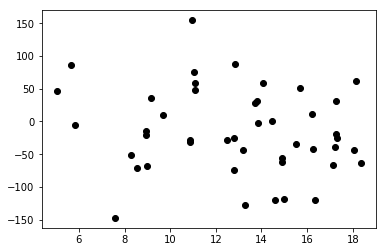

In [14]:
modzlut = modzac-(zlut+8400)
print(np.std(f['focus_C']-modzac))
print(np.std(f['focus_C']-modzlut))
plt.plot(mt,f['focus_C']-modzlut,'ko')

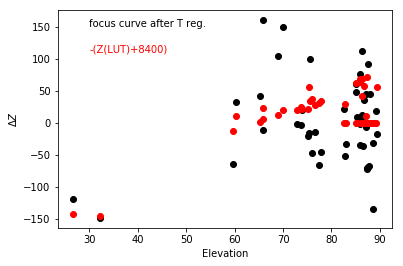

In [36]:
df =  f['focus_C']-  modzsm
plt.plot(f['MOUNTEL'],df,'ko')
plt.plot(f['MOUNTEL'],-(zlut+8400),'ro')
plt.xlabel('Elevation')
plt.ylabel(r'$\Delta Z$')
plt.text(30,150,'focus curve after T reg.',color='k')
plt.text(30,110,'-(Z(LUT)+8400)',color='r')
plt.show()

In [34]:
df = f['focus_C']-modzlut
plt.plot(mt,df,'ko')
w = f['date'] == 20190415
plt.plot(mt[w],df[w],'ro')
plt.show()
taz = f['MOUNTAZ']
wa = taz > 180
taz[wa] = 360-taz[wa]
plt.plot(taz,df,'ko')
print(np.mean(df))

In [35]:
vl = []
ql = []
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0)
    w &= (f[q]*0 == 0)
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA -0.147115975343 45
-0.132740164158 45
TARGTDEC -0.00626076083302 45
0.0545367120727 45
MOUNTHA 0.00944184433624 45
0.0425493077598 45
MOUNTAZ 0.105864156677 45
0.116641428309 45
MOUNTEL -0.100670740067 45
-0.0545516008685 45
AIRMASS 0.0420994051795 45
0.171165755713 45
CI-T1 -0.0921477301497 45
0.21839062766 45
CI-T2 -0.0974753404921 45
0.192026301489 45
CI-T3 -0.0899764909849 45
0.197615045804 45
CI-T4 -0.0934533480492 45
0.199374930087 45
CI-T5 -0.0698756890749 45
0.315334008739 45
TDEWPNT 0.0101797614375 45
0.141574042069 45
TAIRFLOW nan 1
nan 1
TAIRITMP -0.169446465834 45
0.127005160805 45
TAIROTMP -0.167389191957 45
0.135145429885 45
TAIRTEMP -0.174417973909 45
-0.147980148028 45
TCASITMP nan 45
0.168558016637 45
TCASOTMP -0.23085535713 45
-0.202422374235 45
TCSITEMP -0.269404006636 45
-0.240724389309 45
TCSOTEMP -0.200954857882 45
-0.211427605497 45
TDBTEMP -0.354600164855 45
-0.254803665953 45
TPMNIBT -0.3279129416 45
-0.0843919471472 45
TPMEOBT -0.341314901176 45
-0.156

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

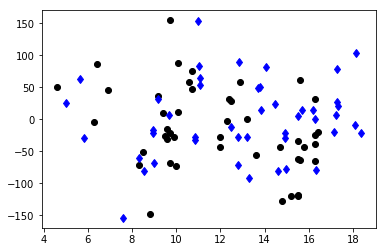

59.6999045639


In [39]:
plt.plot(f['TDBTEMP'],df,'ko')
A = np.vstack([f['TDBTEMP'], np.ones(len(mt))]).T
mdb, cdb = np.linalg.lstsq(A, df)[0]
plt.plot(mt,f['focus_C']-modzlut-(mdb*(f['TDBTEMP'])+cdb),'bd')
plt.show()
print(np.std(f['focus_C']-modzlut-(mdb*(f['TDBTEMP'])+cdb)))

In [41]:
modtbt = modzlut+mdb*(f['TDBTEMP'])+cdb
df = f['focus_C']-modtbt
vl = []
ql = []
hquant = ['TARGTRA','TARGTDEC','MOUNTHA','MOUNTAZ','MOUNTEL','AIRMASS','CI-T1','CI-T2','CI-T3','CI-T4','CI-T5','TDEWPNT','TAIRFLOW','TAIRITMP','TAIROTMP','TAIRTEMP','TCASITMP','TCASOTMP','TCSITEMP','TCSOTEMP','TDBTEMP','TPMNIBT','TPMEOBT','TTRSTEMP','TTRWTEMP','TTRUETBT','TTRUETTT','TTRUNTBT','TTRUNTTT','TTRUSTBT','TTRUSTST','TTRUSTTT','TTRUTSBT','TTRUTSMT','TTRUTSTT','TTRUWTBT','TTRUWTTT','AMNIENTN','AMBIENTS','OUTTEMP','TELBASE']
for q in hquant:
    w = (f[q] != 0)
    w &= (f[q]*0 == 0)
    print(q,np.corrcoef(f[w][q],df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(f[w][q],df[w])[0][1])
    ql.append(q)
    dq = f[q][w]-mt[w]
    print(np.corrcoef(dq,df[w])[0][1],len(f[w]))
    vl.append(np.corrcoef(dq,df[w])[0][1])
    ql.append('d'+q)

TARGTRA -0.196255657144 45
-0.202002047392 45
TARGTDEC 0.103189376774 45
0.0554996928932 45
MOUNTHA 0.00692000102985 45
-0.0184450827606 45
MOUNTAZ -0.0963898144196 45
-0.103810662135 45
MOUNTEL -0.028248127271 45
-0.0611774345441 45
AIRMASS -0.0202833007397 45
-0.129394911329 45
CI-T1 0.195307953405 45
0.181605431546 45
CI-T2 0.191213784195 45
0.166636682961 45
CI-T3 0.194288215528 45
0.168313132464 45
CI-T4 0.191851284185 45
0.160216075955 45
CI-T5 0.221585989427 45
0.285213584981 45
TDEWPNT -0.0185008062524 45
-0.113680932152 45
TAIRFLOW nan 1
nan 1
TAIRITMP 0.116255302436 45
-0.108024557 45
TAIROTMP 0.11697486233 45
-0.111206727113 45
TAIRTEMP 0.121881376033 45
-0.239503137164 45
TCASITMP nan 45
-0.128127605501 45
TCASOTMP 0.076060893679 45
-0.253118732097 45
TCSITEMP 0.0459794833565 45
-0.258531084027 45
TCSOTEMP 0.102942019609 45
-0.205996871386 45
TDBTEMP 1.59238045241e-15 45
-0.217856358559 45
TPMNIBT -0.0525895985973 45
-0.268748950589 45
TPMEOBT -0.0475259898095 45
-0.2922038

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: in

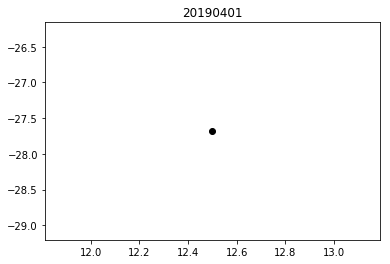

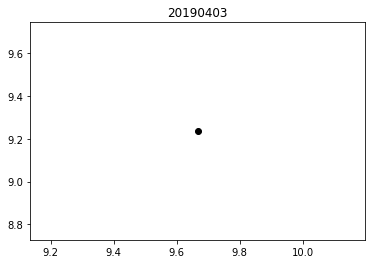

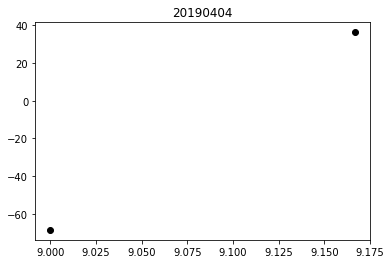

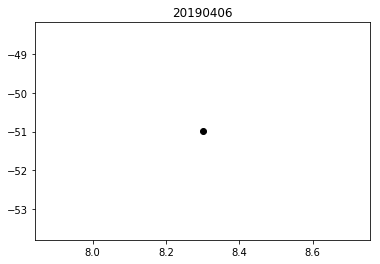

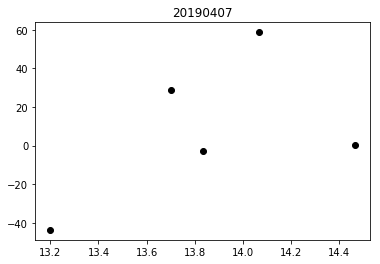

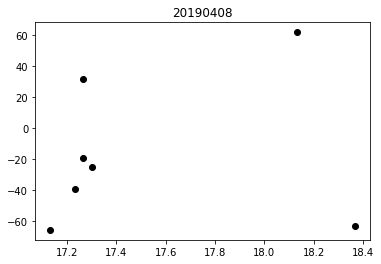

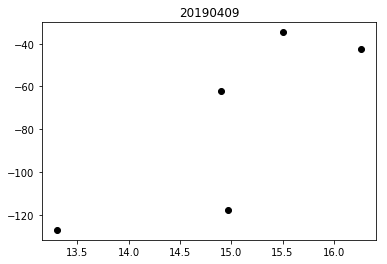

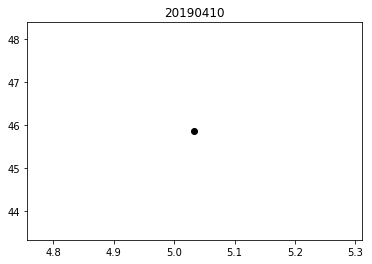

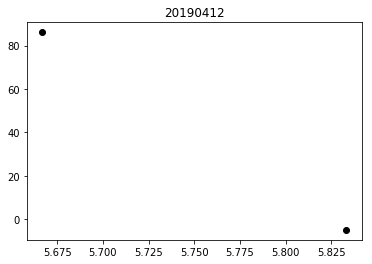

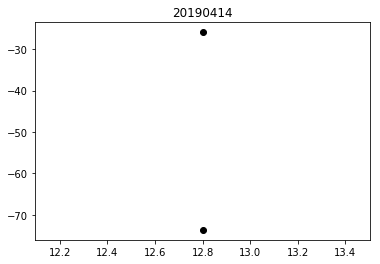

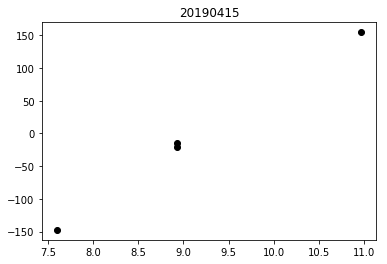

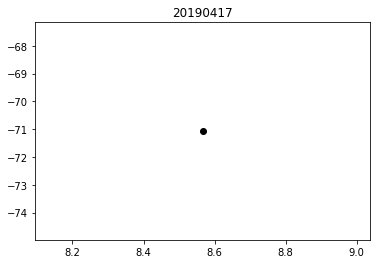

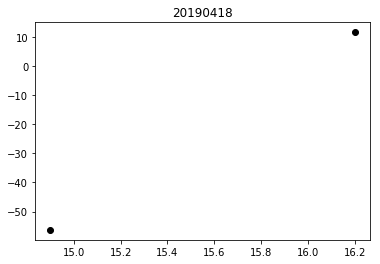

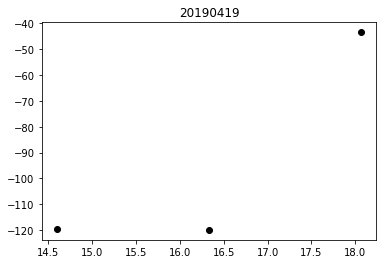

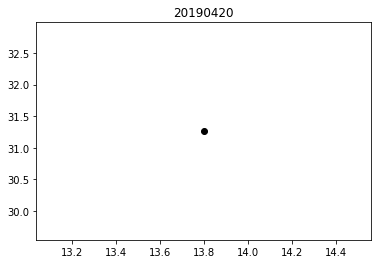

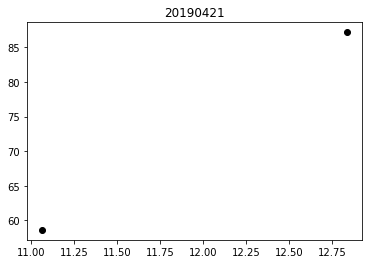

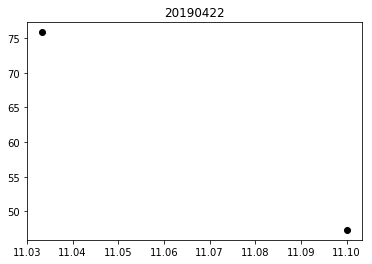

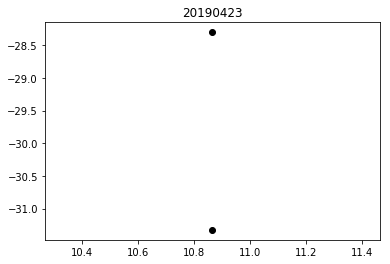

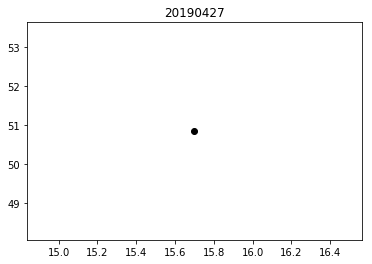

In [28]:
nights = np.unique(f['date'])
for night in nights:
    w = f['date'] == night
    dfw = f[w]['focus_C']-modzlut[w]
    plt.plot(mt[w],dfw,'ko')
    plt.title(night)
    plt.show()

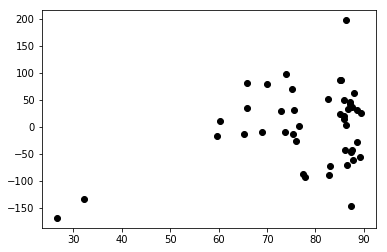

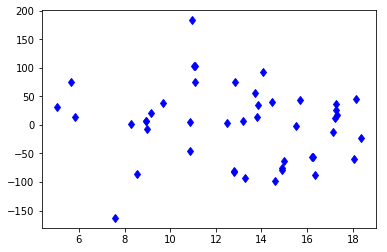

66.2071225813


In [126]:
A = np.vstack([f['MOUNTEL'], np.ones(len(mt))]).T
mel, cel = np.linalg.lstsq(A, df)[0]
plt.plot(mt,f['focus_C']-modz-(mel*(f['MOUNTEL'])+cel),'bd')
plt.show()
print(np.std(f['focus_C']-modz-(mel*(f['MOUNTEL'])+cel)))

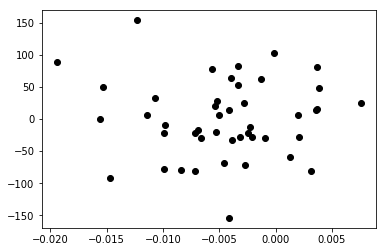

59.6999045639


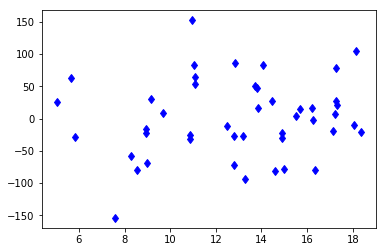

59.6872991629


In [42]:
dTdt = np.loadtxt('dTdt.dat')
plt.plot(dTdt,f['focus_C']-modtbt,'ko')
plt.show()
df = f['focus_C']-modtbt
print(np.std(df))
A = np.vstack([dTdt, np.ones(len(mt))]).T
mdt, cdt = np.linalg.lstsq(A, df)[0]
plt.plot(mt,f['focus_C']-modtbt-(mdt*dTdt+cdt),'bd')
plt.show()
print(np.std(f['focus_C']-modtbt-(mdt*dTdt+cdt)))
#plt.plot(f['MOUNTAZ'],f['focus_C']-modz-(mdt*dTdt+cdt),'ko')
#plt.show()


get target info for each camera for pointing 132.12,29.34 and scale 1.0


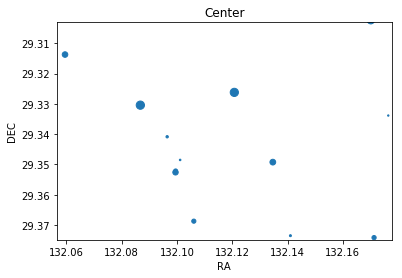

14 stars on center camera
brightest is 11.257
that is it for now, easy to add more info, histograms, etc...


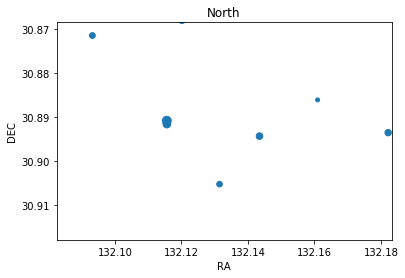

9 stars on north camera
brightest is 10.2955
that is it for now, easy to add more info, histograms, etc...


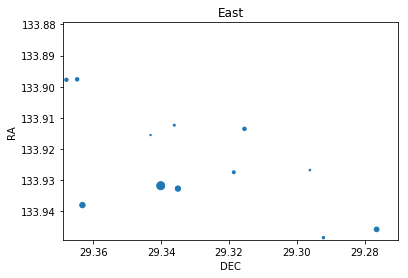

14 stars on east camera
brightest is 11.6597
that is it for now, easy to add more info, histograms, etc...


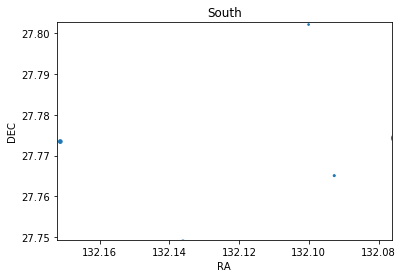

5 stars on south camera
brightest is 12.7303
that is it for now, easy to add more info, histograms, etc...


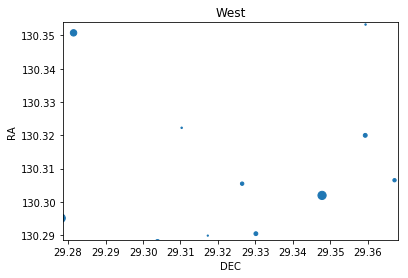

12 stars on west camera
brightest is 10.561
that is it for now, easy to add more info, histograms, etc...


In [2]:
get_info(132.12,29.34)